# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import cv2
import os
import glob
import tensorflow as tf
import random
from os import listdir
from os.path import isfile, join
import collections
import numpy as np
import pandas as pd

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]
n_valid = X_valid.shape[0]
# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

train_labs = pd.Series(y_train)
valid_labs = pd.Series(y_valid)
test_labs = pd.Series(y_test)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
#print("Images Per Class in train set: ",collections.Counter(y_train))

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
#Images per class in train, validation and test datasets
print("Per class Sample::Train \n",train_labs.value_counts())

Per class Sample::Train 
 2     2010
1     1980
13    1920
12    1890
38    1860
10    1800
4     1770
5     1650
25    1350
9     1320
7     1290
8     1260
3     1260
11    1170
18    1080
35    1080
17     990
31     690
14     690
33     599
15     540
26     540
28     480
23     450
30     390
34     360
6      360
16     360
22     330
36     330
40     300
20     300
21     270
39     270
24     240
29     240
32     210
42     210
41     210
27     210
37     180
19     180
0      180
dtype: int64


In [5]:
print("Per class Sample::Validation \n",valid_labs.value_counts())

Per class Sample::Validation 
 2     240
1     240
13    240
10    210
4     210
5     210
38    210
12    210
25    150
3     150
7     150
11    150
9     150
8     150
17    120
35    120
18    120
33     90
14     90
15     90
31     90
6      60
28     60
36     60
16     60
22     60
20     60
26     60
21     60
30     60
34     60
23     60
40     60
39     30
24     30
41     30
32     30
29     30
37     30
42     30
19     30
27     30
0      30
dtype: int64


In [6]:
print("Per class Sample::Test \n",test_labs.value_counts())

Per class Sample::Test 
 2     750
1     720
13    720
12    690
38    690
10    660
4     660
5     630
25    480
9     480
3     450
8     450
7     450
11    420
35    390
18    390
17    360
14    270
31    270
15    210
33    210
26    180
28    150
23    150
16    150
30    150
6     150
22    120
34    120
36    120
24     90
39     90
42     90
20     90
21     90
29     90
40     90
32     60
27     60
41     60
19     60
37     60
0      60
dtype: int64


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

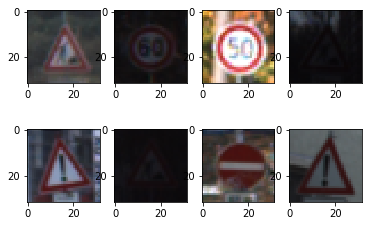

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
# Visualizations will be shown in the notebook.
%matplotlib inline

X_train, y_train = shuffle(X_train, y_train)

#Shuffle the data and print sample images
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_train[i])

[]

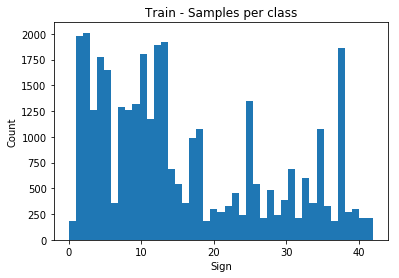

In [8]:
plt.hist(y_train, bins=n_classes)
plt.title('Train - Samples per class')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

[]

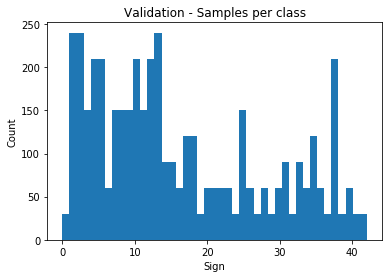

In [9]:
plt.hist(y_valid, bins=n_classes)
plt.title('Validation - Samples per class')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

[]

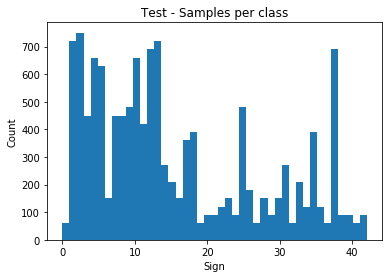

In [10]:
plt.hist(y_test, bins=n_classes)
plt.title('Test - Samples per class')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In [11]:
def greyScaleConverter(ndImages):
        t_list = list()
        for img in (ndImages):
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            t_list.append(img)
        t_list = np.array(t_list)
        return t_list

def normalize(image_data):
    a = 0.1; b = 0.9; MIN = 0; MAX = 255
    return a + (((image_data - MIN)*(b - a))/(MAX - MIN))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #predictions = sess.run(logits, feed_dict={x: batch_x})
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Actual Image


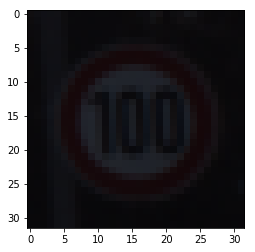

Grey Scale Image


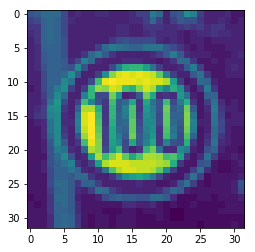

In [12]:
#Showing sample Images after preprocessing

#Show Actual Image
print('Actual Image')
plt.imshow(X_train[100])
plt.show()
print('Grey Scale Image')
grey = greyScaleConverter(X_train[100:101])
plt.imshow(grey.reshape(32,32))
plt.show()

In [13]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#shuffle train data
from sklearn.utils import shuffle
#X_train, y_train = shuffle(X_train, y_train)

#Convert train, test and validation images into grey scale
X_train_grey = greyScaleConverter(X_train)
X_train_grey = normalize(X_train_grey)
X_train_grey = X_train_grey.reshape((X_train_grey.shape[0],X_train_grey.shape[1],
                                                      X_train_grey.shape[2],1))
X_test_grey = greyScaleConverter(X_test)
X_test_grey = X_test_grey.reshape((X_test_grey.shape[0],X_test_grey.shape[1],
                                                      X_test_grey.shape[2],1))
X_test_grey = normalize(X_test_grey)

X_valid_grey = greyScaleConverter(X_valid)
X_valid_grey = X_valid_grey.reshape((X_valid_grey.shape[0],X_valid_grey.shape[1],
                                                      X_valid_grey.shape[2],1))
X_valid_grey = normalize(X_valid_grey)

print("Train shape after grey scale conversion: ",X_train_grey.shape)
print("Test shape after grey scale conversion: ",X_test_grey.shape)
print("Validation shape after grey scale conversion: ",X_valid_grey.shape)
#Normalize data to bring it to [0-1] scale


Train shape after grey scale conversion:  (34799, 32, 32, 1)
Test shape after grey scale conversion:  (12630, 32, 32, 1)
Validation shape after grey scale conversion:  (4410, 32, 32, 1)


### Model Architecture

<h3>Network Change log</h3>
- Change number of applied filters in convolution layers as the features in traffice signs are 
    more complex than minst images
        - Conv1 filters from 6 to 20
        - Conv2 filters from 16 to 32
        - Removed stride in Maxpooling on Conv2
        - FC1 & FC2 left intact
   With Above setting the validation accuracy has improved to ~94%<br><br>

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def SignNet(x,num_labs):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 20), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(20))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x20.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 20, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 32. Output = 800.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2592, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, 0.5)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, num_labs), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(num_labs))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#Training Pipeline

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, len(np.unique(y_train))) #one-hot encode to number of labels
l_rate = 0.001

logits = SignNet(x,num_labs=n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = l_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [16]:
BATCH_SIZE = 256 #1 epoch = 136 iters
ep_size = int(np.ceil(len(X_train_grey)/BATCH_SIZE))*15
EPOCHS = 13000 #l_rate = 0.001

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
            #randomly select BATCH_SIZE images in range of (0 to training_data) 
            batch_idcs = random.sample(range(0, num_examples), BATCH_SIZE)
            batch_x = np.take(X_train_grey, batch_idcs,axis=0)
            batch_y = np.take(y_train, batch_idcs)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            if(i%ep_size == 0): # print validation accuracy after each epoch
                validation_accuracy = evaluate(X_valid_grey, y_valid)
                train_accuracy = evaluate(batch_x,batch_y)
                print("EPOCH {} ...".format(i+1))
                print("Training Accuracy = {:.3f}".format(train_accuracy))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print('---------------------------------------------------------')
    
    #Calculate test net accuracy
    #est_accuracy = evaluate(X_test_grey, y_test)
    #rint("Test Accuracy = {:.3f}".format(test_accuracy))
    saver.save(sess, './signnet')
    sess.close()
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.059
Validation Accuracy = 0.033
---------------------------------------------------------
EPOCH 2041 ...
Training Accuracy = 0.984
Validation Accuracy = 0.910
---------------------------------------------------------
EPOCH 4081 ...
Training Accuracy = 0.957
Validation Accuracy = 0.920
---------------------------------------------------------
EPOCH 6121 ...
Training Accuracy = 1.000
Validation Accuracy = 0.939
---------------------------------------------------------
EPOCH 8161 ...
Training Accuracy = 0.996
Validation Accuracy = 0.939
---------------------------------------------------------
EPOCH 10201 ...
Training Accuracy = 0.984
Validation Accuracy = 0.944
---------------------------------------------------------
EPOCH 12241 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
---------------------------------------------------------
Model saved


In [17]:
saveFile = './signnet'
with tf.Session() as sess:
    saver.restore(sess, saveFile)
    test_accuracy = evaluate(X_test_grey, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    sess.close()

Test Accuracy = 0.933


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [19]:
fpath = "/home/tebd/Documents/sdc/CarND-Traffic-Sign-Classifier-Project/test_Images/"
files = [f for f in listdir(fpath) if isfile(join(fpath, f))]
print(files)

['38.png', '21.jpg', '13.jpg', 'Untitled.ipynb', '11.jpg', '15.png']


In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#Load the images from /home/sundari/Desktop/Traffic_Signs/ into a list of nd-array
img_list = list()
actual_labs = list()

fpath = "/home/tebd/Documents/sdc/CarND-Traffic-Sign-Classifier-Project/test_Images/"
files = [f for f in listdir(fpath) if isfile(join(fpath, f))]
for file in files:
    img_list.append(cv2.imread(fpath+file))
    actual_labs.append(file.split(".")[0])


#Converd rgb to grey scale
img_list_grey = greyScaleConverter(img_list)
img_list_grey = normalize(img_list_grey)
#Bring down the images from corresponding sizes to 32X32
img_list_converted = list()
for img in img_list_grey:
    img = cv2.resize(img, (32, 32))
    img = np.expand_dims(img, axis=2)
    img_list_converted.append(img)

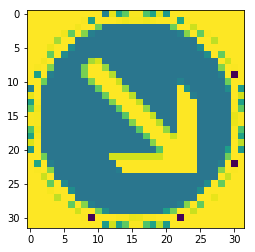

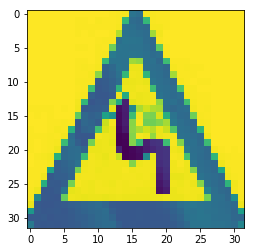

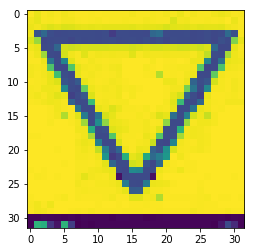

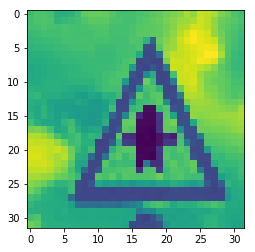

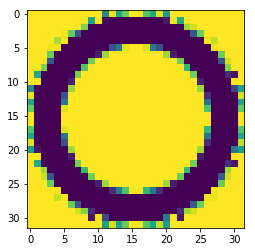

In [21]:
for idx in range(len(img_list_converted)):
    plt.imshow(img_list_converted[idx].reshape(32,32))
    plt.show()

### Predict the Sign Type for Each Image

### Analyzing Performance

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

img_list_converted = np.array(img_list_converted)
#img_list_converted = img_list_converted.reshape((img_list_converted.shape[0],img_list_converted.shape[1],
#                                                      img_list_converted.shape[2],1))
#actual_labs = np.stack((38,13,11,1))
scores = tf.placeholder(tf.float32, (None, 43))
probs = tf.nn.softmax(scores)
#Restore the session
#modified the evaluate function to return logits and accuracy

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = evaluate(img_list_converted,actual_labs)
    pred = tf.nn.softmax(logits)
    predictions = sess.run(pred, feed_dict={x: img_list_converted})

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Accuracy on test Images:",accuracy)
#print("Softmax_Probabilities: ",probs)
print("Actual labels: ", actual_labs)

Accuracy on test Images: 0.800000011921
Actual labels:  ['38', '21', '13', '11', '15']


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

saveFile = './signnet'
saver = tf.train.Saver()
scores = tf.placeholder(tf.float32, (None, 43))
probs = tf.nn.softmax(scores)

with tf.Session() as sess:
    saver.restore(sess, saveFile)
    t_scores = sess.run(logits,feed_dict={x: img_list_converted})
    t_probs = sess.run(probs,feed_dict={scores: t_scores})
    t_probs_5 = sess.run(tf.nn.top_k(t_probs,5))

print("Top-5 predictions: \n",t_probs_5.indices)
print("\n")
print("Top-5 Softmax Probabilities: \n",t_probs_5.values)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
saveFile = './signnet'
saver_ = tf.train.Saver()
with tf.Session() as sess:
    saver_.restore(sess, saveFile)
    tf.get_variable("conv1_Activation")
    #tf_conv1 = sess.run(conv1_Activations, feed_dict={x: img_list_converted[1]})
    #outputFeatureMap(X_train, tf_conv1)


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 